# KNN K最近邻算法

## KNN 原理

近朱者赤，近墨者黑

## K 最近邻算法的用法 

### K 最近邻算法的分类在任务中的应用

- 导入数据集生成器

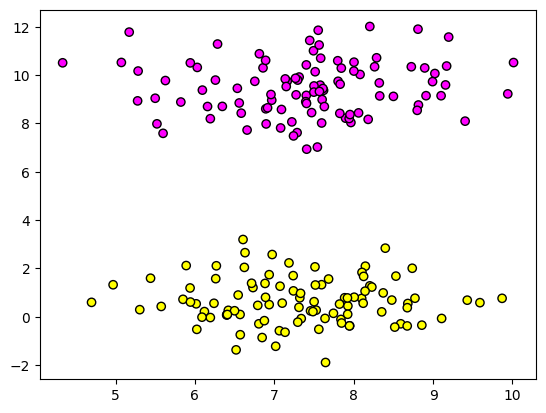

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 生成样本数为 200， 分类为 2 的数据集
data = make_blobs(n_samples=200, centers=2, random_state=8)

X, y = data

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.spring, edgecolors='k')
plt.show()

- K最近邻算法拟合数据

<ipython-input-5-d09f584d39de>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


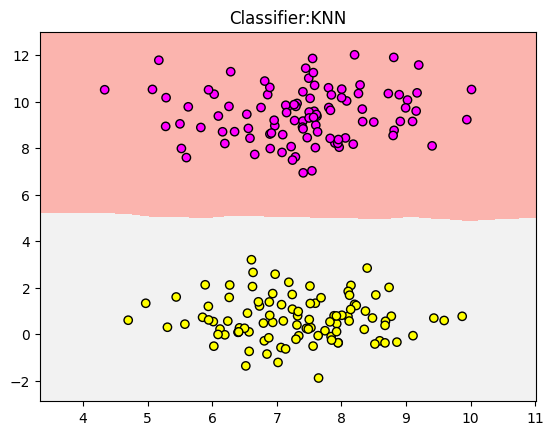

In [5]:
import numpy as np
clf = KNeighborsClassifier()
clf.fit(X,y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, .02),
    np.arange(y_min, y_max, .02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:KNN")

plt.show()

- 假设有一个数据点， 它的两个特征分别 6.75 和 4.82

<ipython-input-6-0a46cf19706a>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


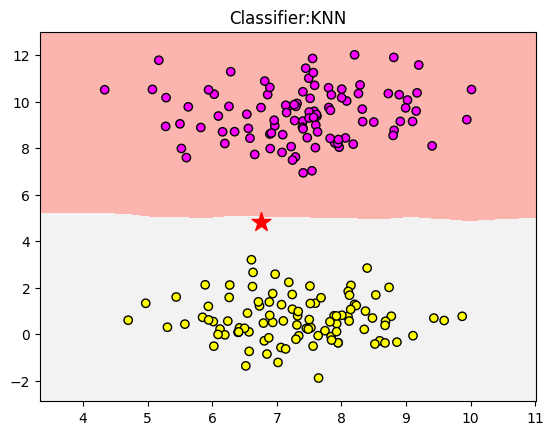

In [6]:
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:KNN")

# 将新的数据用 5 星表示出来
plt.scatter(6.75, 4.82, marker='*', c='red', s=200)

plt.show()

- 图中五角星就代表了新的数据点所在的位置，可以看到 K 最近邻算法将它放在了下方的区域

In [8]:
print('新数据点的分类：',clf.predict([[6.75, 4.82]]))

新数据点的分类： [1]


看起来 K 最近邻算法的工作成果还是很不错，不过这可能是因为我们这次的任务有点太简单

### K 最近邻算法处理多分类任务

- 生成数据

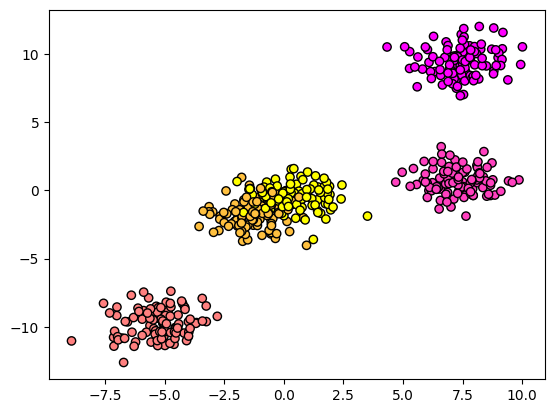

In [9]:
# 生成样本数为 500， 分类为 5 的数据集
data2 = make_blobs(n_samples=500, centers=5, random_state=8)

X2, y2 = data2

plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=plt.cm.spring, edgecolors='k')

plt.show()

- 再次用 K 最近邻算法建立模型来拟合这些数据

<ipython-input-10-bc771340d6ef>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


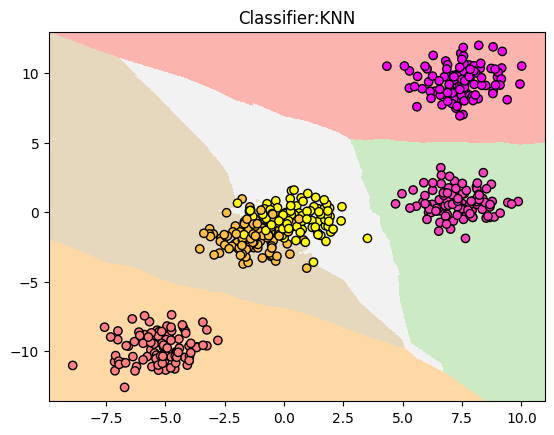

In [10]:
clf = KNeighborsClassifier()
clf.fit(X2,y2)

x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, .02),
    np.arange(y_min, y_max, .02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:KNN")

plt.show()

图中可以看到，K最近邻算法仍然可以把大部分数据点放置于正确的分类中，

但是一小部分数据还是进入了错误的分类中，

这些分类错误的数据点基本都是相互重合的位于图像中心位置的数据点。

- 那么模型的正确率究竟有多高？

In [11]:
print('模型正确率：{:.2f}'.format(clf.score(X2, y2)))

模型正确率：0.96


【结果分析】看来我们虽然故意刁难了K最近邻算法一下，

但它仍然能够将 96% 但数据点放进正确的分类中，

这个结果可以说还是相当不错的。

### K 最近邻算法用于回归分析

- 生成数据集

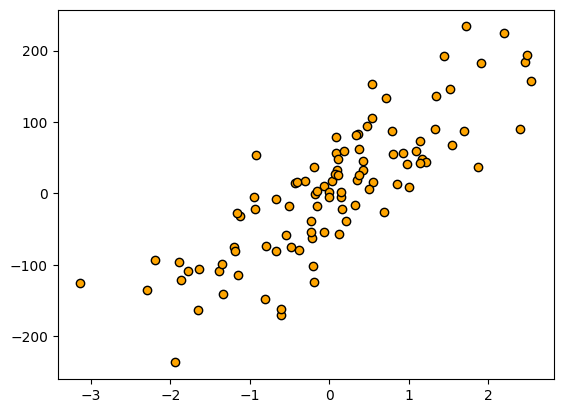

In [12]:
from sklearn.datasets import make_regression

# 生成特征数量为 1，噪音为 50 的数据集
X, y = make_regression(n_features=1, n_informative=1, noise=50, random_state=8)

plt.scatter(X, y, c='orange', edgecolor='k')

plt.show()

- 使用 K 最近邻算法进行回归分析

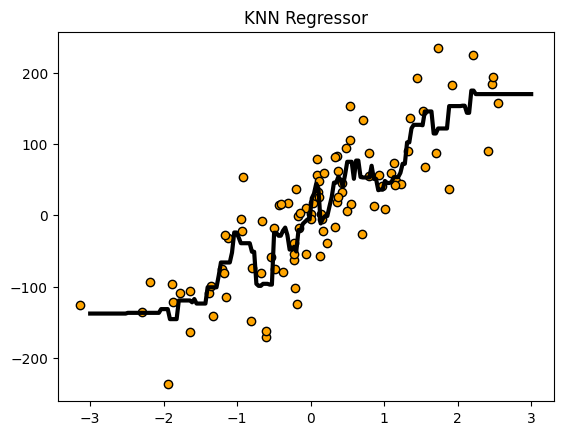

In [13]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor()

reg.fit(X, y)

z = np.linspace(-3, 3, 200).reshape(-1, 1)
plt.scatter(X, y, c='orange',edgecolor='k')
plt.plot(z, reg.predict(z), c='k', linewidth=3)
plt.title('KNN Regressor')

plt.show()

【结果分析】图中黑色的曲线代表的就是K最近邻算法拟合 make_regresson 生成数据所进行的模型。

直观来看模型的拟合程度并不是很好，

有大量的数据点都没有被模型覆盖到。

- 给模型进行评分

In [14]:
print('模型评分：{:.2f}'.format(reg.score(X,y)))

模型评分：0.77


【结果分析】模型的得分只有 0.77，这是一个差强人意的结果，

和我们目测的情况基本一致，为了提高模型的分数，

我们将K最近邻算法的近邻数进行调整。

由于在默认情况下， K 最近邻算法的 n_neighbors 为 5，我们将它减少。 

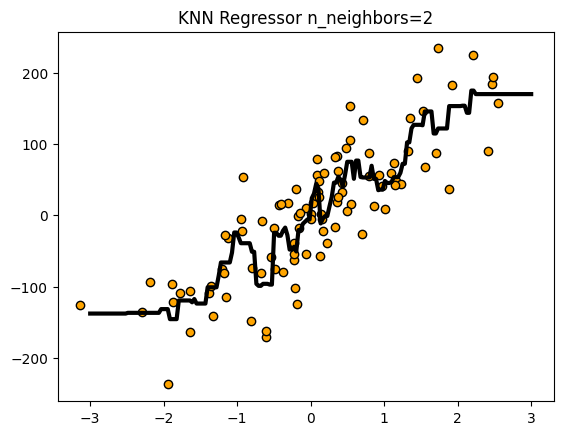

In [15]:
from sklearn.neighbors import KNeighborsRegressor

reg2 = KNeighborsRegressor(n_neighbors=2)

reg2.fit(X, y)

z = np.linspace(-3, 3, 200).reshape(-1, 1)
plt.scatter(X, y, c='orange',edgecolor='k')
plt.plot(z, reg.predict(z), c='k', linewidth=3)
plt.title('KNN Regressor n_neighbors=2')

plt.show()

【结果分析】从图中我们可以看到，黑色曲线更加积极地试图覆盖更多的数据点

也就是说，模型变得更复杂了。

看起来比 n_neighbors 等于 5 的时候更加准确了，

- 再次进行评分，看看分数是否有了提高

In [16]:
print('模型评分： {:.2f}'.format(reg2.score(X,y)))

模型评分： 0.86


【结果分析】和我们预料的一样，模型的评分从 0.77 提升到了 0.86，

可以说是有显著的提升。

不过以上都是基于我们虚构的数据所进行的实验，

接下来我们用一个来自真实世界的数据集来进行 K 最近邻算法的实战。

## K 最近邻算法项目实战--酒的分类

### 对数据进行分析

In [17]:
from sklearn.datasets import load_wine

wine_dataset = load_wine()

In [19]:
print("红酒数据集中的键：\n{}".format(wine_dataset.keys()))

红酒数据集中的键：
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


【结果分析】从结果中我们可以看出，

酒数据集中包含数据 “data”，

目标分类“target”，

目标分类名称“target_names”，

数据描述“DESCR”，

以及特征变量的名称“features_names”。

- 数据集中究竟有多少样本（samples），又有多少变量（features）

In [20]:
print('数据概况：{}'.format(wine_dataset['data'].shape))

数据概况：(178, 13)


【结果分析】可以看出，酒数据集中共有178个样本，每条数据有13个特征。

- 更细节的信息

In [21]:
print(wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

【结果分析】从结果中我们可以看出，酒数据集中的 178 个样本被归入 3 个类别中，

分别是 class_0, class_1和 class_2,

其中 class_0 中包含 59 个样本，

class_1 中包含 71 个样本，

class_2 中包含 48 个样本。

从 1）至 13）分别是 13个特征变量，

包括酒精含量、苹果酸、镁含量、色彩饱和度、等

### 生成训练数据集和测试数据集

In [23]:
from sklearn.model_selection import train_test_split

# 将数据集拆分为训练数据集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    wine_dataset['data'], wine_dataset['target'], random_state=0
)

# 我们已经对酒数据集完成了拆分。
# random_state 将指定为 0，这是因为 train_test_split 函数会生成伪随机数。

- 看一看 train_test_splits 函拆分后的数据大概是什么情况

In [25]:
print('X_train shape:{}'.format(X_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_train shape:{}'.format(y_train.shape))
print('y_test shape:{}'.format(y_test.shape))

X_train shape:(133, 13)
X_test shape:(45, 13)
y_train shape:(133,)
y_test shape:(45,)


### 使用 K 最近邻算法进行建模

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier 指定了一个参数， n_neighbors=1 。

正如我们前文中所说，在 scikit-learn 中，机器学习模块都是在其固定的类中运行，

而 K 最近邻分类算法是在 neighbors 模块中的 neighbors 模块中的 KNeighborsClassifier 类中运行。

而我们从一个类中创建对象的时候，就需要给模型指定一个参数。

对于 KNeighborsClassifier 类来说，最关键的参数就是近邻的数量，也就是 n_neighbors 。

而 knn 则是我们在 KNeighborsClassifier 类中创建的一个对象。

- 使用 knn 对象的 fit 方法进行建模

In [28]:
knn.fit(X_train, y_train)

print(knn)

print('\n==================')

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)



KNeighborsClassifier(n_neighbors=1)

### 使用模型对新样本的分类进行预测

现在我们可以使用刚刚建好的模型对新的样本分类进行预测了，不过在这之前，

可以先用测试数据集对模型进行打分，这就是我们创建测试数据集的目的。

测试数据集并不参与建模，但是我们可以用模型对测试集数据进行分类，

然后和测试数据集中的样本实际分类进行对比，看吻合度有多高。

吻合度越高，模型的得分越高，说明模型的预测越来越准确，满分是 1.0 。

- 开始评分

In [29]:
print('测试集数据得分： {:.2f}'.format(knn.score(X_test,y_test)))

测试集数据得分： 0.76


【结果分析】我们看到，这个模型在预测测试数据集的样本分类上得分并不高，只有 0.76，

也就是说，模型对于新的样本数据做出正确分类预测的概率是 76%。

这个结果差强人意，不过我们只是用来演示 K 最近邻算法，

所以不用太纠结分数的问题。

- 现在我们用建好的模型对新酒做出分类预测

In [30]:
import numpy as np

X_new = np.array([[13.2, 2.77, 2.51, 18.5, 96.6, 1.04, 2.55, 0.57, 1.47, 6.2 , 1.05, 3.33,820]])

prediction = knn.predict(X_new)

print("预测新红酒的分类： {}".format(wine_dataset['target_names'][prediction]))

预测新红酒的分类： ['class_2']


【结果分析】模型把新酒的分类预测为 class_2, 虽然准确率只有 76%，

但对于我们的第一个机器学习的实战项目来说，还是相当不错的

## 小结

在本章中，我们介绍了K最近邻算法的原理和它的使用方法，包括K最近邻分类和K最近邻回归，并且使用K最近邻算法帮助小C对酒的分类进行了分析。

不过我们也看到，对于这个13维的数据集来说，K最近邻算法的表现，并不能用优异来形容。这也确实是K最近邻算法的一大软肋。

K最近邻算法可以说是一个非常经典而且原理十分容易理解的算法，作为第一个算法来进行学习是可以帮助大家在未来能够更好地理解其他的算法模型。

不过K最近邻算法在实际使用当中会有很多问题，例如它需要对数据集认真地进行预处理、对规模超大的数据集拟合的时间较长、对高维数据集拟合欠佳，以及对于稀疏数据集束手无策等。

所以在当前的各种常见的应用场景中，K最近邻算法的使用并不多见。

接下来，我们会开始学习同样经典，而且在高维数据集中表现良好的算法——广义线性模型。